# SerbaMart Performance Analysis: Sales, Shipping & Customer Profitability

## 1️⃣ Title: Identifying sales drivers, fixing delivery bottlenecks, and unlocking customer value

This project analyzes sales, shipping, and customer data from a retail superstore to uncover product performance, delivery efficiency, and customer purchasing behavior. The goal is to identify the products driving sales, the shipping methods causing delays, and the customer segments contributing most to profitability. These insights can support management in improving fulfillment processes, optimizing sales strategies, and enhancing customer satisfaction.

## 2️⃣ Scoping Your Data Analysis Project

Big questions:
- How do sales vary over time?
- Which products bring in the most sales?
- Are certain shipping methods causing more delivery delays?
- Are there regional trends in shipping delays?
- Which customer segments are the most profitable for the business?
- Are there any relationship between Sales and Profit?
  
What are the datasets and data columns that you will be exploring?
- orders.csv: Order ID, Order Date, Shipping ID, Customer ID, Product Category ID, Sales, Profit
- product.csv: Product Category ID, Category, Sub-Category
- customers.csv: Customer ID, Segment
- shipping.csv: Shipping ID, Ship Mode, Courier, Delivery Timing, State

What relationships between the data columns will you be exploring?
- Order Date vs Sales Trends: To observe how sales vary over time
- Product Category vs Sales - To identify the top-selling category and sub-category
- Shipping Method vs Delivery Timing - To compare how different shipping methods and couriers perform
- State vs Delivery Timing: To understand whether shipping delays are concentrated in specific geographic states.
- Customer Segment vs Profitability: To assess which segments (Consumer, Corporate, Home Office) generate the highest profit contribution.
- Profit vs Sales: To understand whether higher sales always translate into higher profits

## 3️⃣Data Preparation

### Data Cleaning & Data Transformation:

- Handle missing values in datasets.




In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load all dataset
orders = pd.read_csv('orders.csv')
product = pd.read_csv('product.csv')
customers = pd.read_csv('customers.csv')
shipping = pd.read_csv('shipping.csv')

#### A. Orders Dataset

- no null-values
- datatype to note : Order Date
- no duplicate rows

In [3]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1238 entries, 0 to 1237
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Order ID               1238 non-null   object 
 1   Order Date             1238 non-null   object 
 2   Ship Code              1238 non-null   object 
 3   Ship Reference Number  1238 non-null   int64  
 4   Shipping ID            1238 non-null   object 
 5   Payment method         1238 non-null   object 
 6   Customer ID            1238 non-null   object 
 7   Product Category ID    1238 non-null   object 
 8   Sales                  1238 non-null   float64
 9   Quantity               1238 non-null   int64  
 10  Discount               1238 non-null   float64
 11  Profit                 1238 non-null   float64
dtypes: float64(3), int64(2), object(7)
memory usage: 116.2+ KB


In [4]:
orders.head()

,Order ID,Order Date,Ship Code,Ship Reference Number,Shipping ID,Payment method,Customer ID,Product Category ID,Sales,Quantity,Discount,Profit
0,OD0001,2023-05-28,AE-2023,1231682,AE-2023-1231682,E-wallet,CS0001,FUR001,261.9600,2,0.00,41.9136
1,OD0002,2023-05-23,AE-2023,1263608,AE-2023-1263608,Mastercard,CS0002,FUR002,731.9400,3,0.00,219.5820
2,OD0003,2023-05-17,AE-2023,303016,AE-2023-303016,E-wallet,CS0003,OS006,14.6200,2,0.00,6.8714
3,OD0004,2023-05-23,AE-2023,304471,AE-2023-304471,Visa,CS0004,FUR004,957.5775,5,0.45,-383.0310
4,OD0005,2023-05-22,AE-2023,3123605,AE-2023-3123605,Visa,CS0005,OS008,22.3680,2,0.20,2.5164


In [5]:
orders.duplicated().sum()

np.int64(0)

#### B. Product Dataset
- no null-value
- Have duplicate rows

In [6]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1238 entries, 0 to 1237
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Product Category ID  1238 non-null   object
 1   Category             1238 non-null   object
 2   Sub-Category         1238 non-null   object
dtypes: object(3)
memory usage: 29.1+ KB


In [7]:
product.head()

,Product Category ID,Category,Sub-Category
0,FUR001,Furniture,Bookcases
1,FUR002,Furniture,Chairs
2,OS006,Office Supplies,Labels
3,FUR004,Furniture,Tables
4,OS008,Office Supplies,Storage


In [8]:
product.duplicated().sum()

np.int64(1221)

In [9]:
product.drop_duplicates(inplace=True)
product.duplicated().sum()

np.int64(0)

In [10]:
product.shape

(17, 3)

#### C. Customers Dataset
- no null-values
- Have duplicate rows

In [11]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1238 entries, 0 to 1237
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Customer ID  1238 non-null   object
 1   Name         1238 non-null   object
 2   Gender       1238 non-null   object
 3   Segment      1238 non-null   object
dtypes: object(4)
memory usage: 38.8+ KB


In [12]:
customers.head()

,Customer ID,Name,Gender,Segment
0,CS0001,Li Wei,Male,Consumer
1,CS0002,Chen Jia,Female,Consumer
2,CS0003,Zhang Lei,Male,Corporate
3,CS0004,Wang Fang,Female,Consumer
4,CS0005,Liu Ying,Female,Consumer


In [13]:
customers.duplicated().sum()

np.int64(696)

In [14]:
display(customers[customers.duplicated()])

,Customer ID,Name,Gender,Segment
542,CS0136,Jefry Lajim,Male,Consumer
543,CS0004,Wang Fang,Female,Consumer
544,CS0004,Wang Fang,Female,Consumer
545,CS0005,Liu Ying,Female,Consumer
546,CS0005,Liu Ying,Female,Consumer
...,...,...,...,...
1233,CS0539,Bobby Suan,Male,Consumer
1234,CS0539,Bobby Suan,Male,Consumer
1235,CS0541,Li Wei,Male,Consumer
1236,CS0541,Li Wei,Male,Consumer


In [15]:
customers.drop_duplicates(inplace=True)
customers.duplicated().sum()

np.int64(0)

In [16]:
customers.shape

(542, 4)

#### D. Shipping Dataset
- no null-values but have #DIV/0! for delivery timing
- no duplicate rows
- data type to note : Order Date, Delivery Date
- Delivery Timing - #DIV/0! data rows might should not be removed. Require more exploration

In [17]:
shipping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1238 entries, 0 to 1237
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Shipping ID                  1238 non-null   object
 1   Ship Mode                    1238 non-null   object
 2   Courier                      1238 non-null   object
 3   Order Date                   1238 non-null   object
 4   Delivered Date               1238 non-null   object
 5   Delivery Timing              1238 non-null   object
 6   City, State and Postal code  1238 non-null   object
dtypes: object(7)
memory usage: 67.8+ KB


In [18]:
shipping.head()

,Shipping ID,Ship Mode,Courier,Order Date,Delivered Date,Delivery Timing,"City, State and Postal code"
0,AE-2023-1231682,Second Class,Parcel Express,2023-05-28,2023-06-17,#DIV/0!,Kuala Lumpur-Wilayah Persekutuan-50000
1,AE-2023-1263608,Second Class,Parcel Express,2023-05-23,2023-06-12,#DIV/0!,George Town-Penang-10200
2,AE-2023-303016,Second Class,Hero Van,2023-05-17,2023-06-06,#DIV/0!,Johor Bahru-Johor-80000
3,AE-2023-304471,Standard Class,HomeLaju,2023-05-23,2023-06-12,#DIV/0!,Kota Kinabalu-Sabah-88000
4,AE-2023-3123605,Standard Class,HomeLaju,2023-05-22,2023-06-21,#DIV/0!,Kuching-Sarawak-93000


In [19]:
shipping.duplicated().sum()

np.int64(0)

### Data Manipulation and Data Transformation:
- Ensure data types and formatting are consistent.
- Create new columns that are helpful for data analysis



#### A. Orders Dataset

In [20]:
# Convert date variable to datetime datatype
orders['Order Date'] = pd.to_datetime(orders['Order Date'], errors='coerce')

# Round sales values into 2 decimal points
orders['Sales'] = orders['Sales'].round(2)

# Round profit values into 2 decimal points
orders['Profit'] = orders['Profit'].round(2)

In [21]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1238 entries, 0 to 1237
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Order ID               1238 non-null   object        
 1   Order Date             1238 non-null   datetime64[ns]
 2   Ship Code              1238 non-null   object        
 3   Ship Reference Number  1238 non-null   int64         
 4   Shipping ID            1238 non-null   object        
 5   Payment method         1238 non-null   object        
 6   Customer ID            1238 non-null   object        
 7   Product Category ID    1238 non-null   object        
 8   Sales                  1238 non-null   float64       
 9   Quantity               1238 non-null   int64         
 10  Discount               1238 non-null   float64       
 11  Profit                 1238 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(6)
memory u

In [22]:
orders.head()

,Order ID,Order Date,Ship Code,Ship Reference Number,Shipping ID,Payment method,Customer ID,Product Category ID,Sales,Quantity,Discount,Profit
0,OD0001,2023-05-28,AE-2023,1231682,AE-2023-1231682,E-wallet,CS0001,FUR001,261.96,2,0.00,41.91
1,OD0002,2023-05-23,AE-2023,1263608,AE-2023-1263608,Mastercard,CS0002,FUR002,731.94,3,0.00,219.58
2,OD0003,2023-05-17,AE-2023,303016,AE-2023-303016,E-wallet,CS0003,OS006,14.62,2,0.00,6.87
3,OD0004,2023-05-23,AE-2023,304471,AE-2023-304471,Visa,CS0004,FUR004,957.58,5,0.45,-383.03
4,OD0005,2023-05-22,AE-2023,3123605,AE-2023-3123605,Visa,CS0005,OS008,22.37,2,0.20,2.52


#### D. Shipping Dataset

- Change datatype

In [23]:
# Convert date variables to datetime datatype
shipping['Order Date'] = pd.to_datetime(shipping['Order Date'], errors='coerce')
shipping['Delivered Date'] = pd.to_datetime(shipping['Delivered Date'], errors='coerce')

In [24]:
shipping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1238 entries, 0 to 1237
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Shipping ID                  1238 non-null   object        
 1   Ship Mode                    1238 non-null   object        
 2   Courier                      1238 non-null   object        
 3   Order Date                   1238 non-null   datetime64[ns]
 4   Delivered Date               1238 non-null   datetime64[ns]
 5   Delivery Timing              1238 non-null   object        
 6   City, State and Postal code  1238 non-null   object        
dtypes: datetime64[ns](2), object(5)
memory usage: 67.8+ KB


- Manipulate and Transform Delivery Timing = #DIV/0!

In [25]:
shipping.head()

,Shipping ID,Ship Mode,Courier,Order Date,Delivered Date,Delivery Timing,"City, State and Postal code"
0,AE-2023-1231682,Second Class,Parcel Express,2023-05-28,2023-06-17,#DIV/0!,Kuala Lumpur-Wilayah Persekutuan-50000
1,AE-2023-1263608,Second Class,Parcel Express,2023-05-23,2023-06-12,#DIV/0!,George Town-Penang-10200
2,AE-2023-303016,Second Class,Hero Van,2023-05-17,2023-06-06,#DIV/0!,Johor Bahru-Johor-80000
3,AE-2023-304471,Standard Class,HomeLaju,2023-05-23,2023-06-12,#DIV/0!,Kota Kinabalu-Sabah-88000
4,AE-2023-3123605,Standard Class,HomeLaju,2023-05-22,2023-06-21,#DIV/0!,Kuching-Sarawak-93000


In [26]:
# Show distinct data of delivery timing column
shipping['Delivery Timing'].unique()

array(['#DIV/0!', 'Early', 'On time', 'Late'], dtype=object)

In [27]:
# Add new column with Delivered Date - Order Date to identify the delivery timing grouping
shipping['Delivery Duration'] = (shipping['Delivered Date'] - shipping['Order Date']).dt.days
shipping.head(10)

,Shipping ID,Ship Mode,Courier,Order Date,Delivered Date,Delivery Timing,"City, State and Postal code",Delivery Duration
0,AE-2023-1231682,Second Class,Parcel Express,2023-05-28,2023-06-17,#DIV/0!,Kuala Lumpur-Wilayah Persekutuan-50000,20
1,AE-2023-1263608,Second Class,Parcel Express,2023-05-23,2023-06-12,#DIV/0!,George Town-Penang-10200,20
2,AE-2023-303016,Second Class,Hero Van,2023-05-17,2023-06-06,#DIV/0!,Johor Bahru-Johor-80000,20
3,AE-2023-304471,Standard Class,HomeLaju,2023-05-23,2023-06-12,#DIV/0!,Kota Kinabalu-Sabah-88000,20
4,AE-2023-3123605,Standard Class,HomeLaju,2023-05-22,2023-06-21,#DIV/0!,Kuching-Sarawak-93000,30
5,AE-2023-3179243,Standard Class,Hero Van,2023-05-23,2023-06-02,#DIV/0!,Kuala Lumpur-Wilayah Persekutuan-50000,10
6,AE-2023-3323423,Standard Class,Parcel Express,2023-05-03,2023-05-23,#DIV/0!,George Town-Penang-10200,20
7,AE-2023-3371820,Standard Class,HomeLaju,2023-05-24,2023-06-03,#DIV/0!,Johor Bahru-Johor-80000,10
8,AE-2023-350473,Standard Class,Parcel Express,2023-05-17,2023-06-06,#DIV/0!,Kota Kinabalu-Sabah-88000,20
9,AE-2023-4073208,Standard Class,HomeLaju,2023-05-11,2023-06-10,#DIV/0!,Kuching-Sarawak-93000,30


In [28]:
# Delivery Timing Grouping:
# Early = 10
# On time = 20
# Late = 30

In [29]:
# define function and impute the #DIV/0! with grouping

def timing_grouping(x):
    if x == 10:
        return 'Early'
    elif x == 20:
        return 'On time'
    else:
        return 'Late'

shipping['Delivery Timing'] = shipping['Delivery Duration'].apply(timing_grouping)
shipping.head(10)

,Shipping ID,Ship Mode,Courier,Order Date,Delivered Date,Delivery Timing,"City, State and Postal code",Delivery Duration
0,AE-2023-1231682,Second Class,Parcel Express,2023-05-28,2023-06-17,On time,Kuala Lumpur-Wilayah Persekutuan-50000,20
1,AE-2023-1263608,Second Class,Parcel Express,2023-05-23,2023-06-12,On time,George Town-Penang-10200,20
2,AE-2023-303016,Second Class,Hero Van,2023-05-17,2023-06-06,On time,Johor Bahru-Johor-80000,20
3,AE-2023-304471,Standard Class,HomeLaju,2023-05-23,2023-06-12,On time,Kota Kinabalu-Sabah-88000,20
4,AE-2023-3123605,Standard Class,HomeLaju,2023-05-22,2023-06-21,Late,Kuching-Sarawak-93000,30
5,AE-2023-3179243,Standard Class,Hero Van,2023-05-23,2023-06-02,Early,Kuala Lumpur-Wilayah Persekutuan-50000,10
6,AE-2023-3323423,Standard Class,Parcel Express,2023-05-03,2023-05-23,On time,George Town-Penang-10200,20
7,AE-2023-3371820,Standard Class,HomeLaju,2023-05-24,2023-06-03,Early,Johor Bahru-Johor-80000,10
8,AE-2023-350473,Standard Class,Parcel Express,2023-05-17,2023-06-06,On time,Kota Kinabalu-Sabah-88000,20
9,AE-2023-4073208,Standard Class,HomeLaju,2023-05-11,2023-06-10,Late,Kuching-Sarawak-93000,30


- Segregate City, State and Postal Code into different columns

In [30]:
shipping[['City', 'State', 'Postal Code']] = shipping['City, State and Postal code'].str.split('-', expand=True)
shipping.head()

,Shipping ID,Ship Mode,Courier,Order Date,Delivered Date,Delivery Timing,"City, State and Postal code",Delivery Duration,City,State,Postal Code
0,AE-2023-1231682,Second Class,Parcel Express,2023-05-28,2023-06-17,On time,Kuala Lumpur-Wilayah Persekutuan-50000,20,Kuala Lumpur,Wilayah Persekutuan,50000
1,AE-2023-1263608,Second Class,Parcel Express,2023-05-23,2023-06-12,On time,George Town-Penang-10200,20,George Town,Penang,10200
2,AE-2023-303016,Second Class,Hero Van,2023-05-17,2023-06-06,On time,Johor Bahru-Johor-80000,20,Johor Bahru,Johor,80000
3,AE-2023-304471,Standard Class,HomeLaju,2023-05-23,2023-06-12,On time,Kota Kinabalu-Sabah-88000,20,Kota Kinabalu,Sabah,88000
4,AE-2023-3123605,Standard Class,HomeLaju,2023-05-22,2023-06-21,Late,Kuching-Sarawak-93000,30,Kuching,Sarawak,93000


In [31]:
# drop the original column
shipping.drop('City, State and Postal code', axis=1, inplace=True)
shipping.head()

,Shipping ID,Ship Mode,Courier,Order Date,Delivered Date,Delivery Timing,Delivery Duration,City,State,Postal Code
0,AE-2023-1231682,Second Class,Parcel Express,2023-05-28,2023-06-17,On time,20,Kuala Lumpur,Wilayah Persekutuan,50000
1,AE-2023-1263608,Second Class,Parcel Express,2023-05-23,2023-06-12,On time,20,George Town,Penang,10200
2,AE-2023-303016,Second Class,Hero Van,2023-05-17,2023-06-06,On time,20,Johor Bahru,Johor,80000
3,AE-2023-304471,Standard Class,HomeLaju,2023-05-23,2023-06-12,On time,20,Kota Kinabalu,Sabah,88000
4,AE-2023-3123605,Standard Class,HomeLaju,2023-05-22,2023-06-21,Late,30,Kuching,Sarawak,93000


In [32]:
# Use “Kuala Lumpur” instead of “Wilayah Persekutuan” to make it clearer which state is referred to
shipping.replace({'State': {'Wilayah Persekutuan': 'Kuala Lumpur'}}, inplace=True)
shipping.head()

,Shipping ID,Ship Mode,Courier,Order Date,Delivered Date,Delivery Timing,Delivery Duration,City,State,Postal Code
0,AE-2023-1231682,Second Class,Parcel Express,2023-05-28,2023-06-17,On time,20,Kuala Lumpur,Kuala Lumpur,50000
1,AE-2023-1263608,Second Class,Parcel Express,2023-05-23,2023-06-12,On time,20,George Town,Penang,10200
2,AE-2023-303016,Second Class,Hero Van,2023-05-17,2023-06-06,On time,20,Johor Bahru,Johor,80000
3,AE-2023-304471,Standard Class,HomeLaju,2023-05-23,2023-06-12,On time,20,Kota Kinabalu,Sabah,88000
4,AE-2023-3123605,Standard Class,HomeLaju,2023-05-22,2023-06-21,Late,30,Kuching,Sarawak,93000


### Data Joining:

- Join the datasets using a unique identifier.

In [33]:
merged_1 = pd.merge(orders, shipping, on = 'Shipping ID', how = 'left')
merged_1.shape

(1248, 21)

In [34]:
merged_2 = pd.merge(merged_1, product, on = 'Product Category ID', how = 'left')
merged_2.shape

(1248, 23)

In [35]:
merged_data = pd.merge(merged_2, customers, on = 'Customer ID', how = 'left')
merged_data.head()

,Order ID,Order Date_x,Ship Code,Ship Reference Number,Shipping ID,Payment method,Customer ID,Product Category ID,Sales,Quantity,...,Delivery Timing,Delivery Duration,City,State,Postal Code,Category,Sub-Category,Name,Gender,Segment
0,OD0001,2023-05-28,AE-2023,1231682,AE-2023-1231682,E-wallet,CS0001,FUR001,261.96,2,...,On time,20,Kuala Lumpur,Kuala Lumpur,50000,Furniture,Bookcases,Li Wei,Male,Consumer
1,OD0002,2023-05-23,AE-2023,1263608,AE-2023-1263608,Mastercard,CS0002,FUR002,731.94,3,...,On time,20,George Town,Penang,10200,Furniture,Chairs,Chen Jia,Female,Consumer
2,OD0003,2023-05-17,AE-2023,303016,AE-2023-303016,E-wallet,CS0003,OS006,14.62,2,...,On time,20,Johor Bahru,Johor,80000,Office Supplies,Labels,Zhang Lei,Male,Corporate
3,OD0004,2023-05-23,AE-2023,304471,AE-2023-304471,Visa,CS0004,FUR004,957.58,5,...,On time,20,Kota Kinabalu,Sabah,88000,Furniture,Tables,Wang Fang,Female,Consumer
4,OD0005,2023-05-22,AE-2023,3123605,AE-2023-3123605,Visa,CS0005,OS008,22.37,2,...,Late,30,Kuching,Sarawak,93000,Office Supplies,Storage,Liu Ying,Female,Consumer


## 4️⃣ Exploratory Data Analysis




In [36]:
# Remove Order Date_y since the data are same as Order Date_x and rename it as Order Date
merged_data.drop(columns = 'Order Date_y', axis=1, inplace=True)
merged_data.rename(columns = {'Order Date_x' : 'Order Date'}, inplace=True)

In [37]:
pd.set_option('display.max_columns', None)
merged_data.head()

,Order ID,Order Date,Ship Code,Ship Reference Number,Shipping ID,Payment method,Customer ID,Product Category ID,Sales,Quantity,Discount,Profit,Ship Mode,Courier,Delivered Date,Delivery Timing,Delivery Duration,City,State,Postal Code,Category,Sub-Category,Name,Gender,Segment
0,OD0001,2023-05-28,AE-2023,1231682,AE-2023-1231682,E-wallet,CS0001,FUR001,261.96,2,0.00,41.91,Second Class,Parcel Express,2023-06-17,On time,20,Kuala Lumpur,Kuala Lumpur,50000,Furniture,Bookcases,Li Wei,Male,Consumer
1,OD0002,2023-05-23,AE-2023,1263608,AE-2023-1263608,Mastercard,CS0002,FUR002,731.94,3,0.00,219.58,Second Class,Parcel Express,2023-06-12,On time,20,George Town,Penang,10200,Furniture,Chairs,Chen Jia,Female,Consumer
2,OD0003,2023-05-17,AE-2023,303016,AE-2023-303016,E-wallet,CS0003,OS006,14.62,2,0.00,6.87,Second Class,Hero Van,2023-06-06,On time,20,Johor Bahru,Johor,80000,Office Supplies,Labels,Zhang Lei,Male,Corporate
3,OD0004,2023-05-23,AE-2023,304471,AE-2023-304471,Visa,CS0004,FUR004,957.58,5,0.45,-383.03,Standard Class,HomeLaju,2023-06-12,On time,20,Kota Kinabalu,Sabah,88000,Furniture,Tables,Wang Fang,Female,Consumer
4,OD0005,2023-05-22,AE-2023,3123605,AE-2023-3123605,Visa,CS0005,OS008,22.37,2,0.20,2.52,Standard Class,HomeLaju,2023-06-21,Late,30,Kuching,Sarawak,93000,Office Supplies,Storage,Liu Ying,Female,Consumer


In [38]:
# Drop unrelevant columns
merged_data.drop(columns = ['Ship Code', 'Ship Reference Number', 'Shipping ID', 'Customer ID', 'Product Category ID',\
                            'City','Postal Code'], axis=1, inplace=True)

In [39]:
# Expand Date into Year, Month, Day and Day of Week for trend analysis
merged_data['Year'] = merged_data['Order Date'].dt.year
merged_data['Month'] = merged_data['Order Date'].dt.month
merged_data['Day'] = merged_data['Order Date'].dt.day
merged_data['Day_of_Week'] = merged_data['Order Date'].dt.day_name()
merged_data.head()

,Order ID,Order Date,Payment method,Sales,Quantity,Discount,Profit,Ship Mode,Courier,Delivered Date,Delivery Timing,Delivery Duration,State,Category,Sub-Category,Name,Gender,Segment,Year,Month,Day,Day_of_Week
0,OD0001,2023-05-28,E-wallet,261.96,2,0.00,41.91,Second Class,Parcel Express,2023-06-17,On time,20,Kuala Lumpur,Furniture,Bookcases,Li Wei,Male,Consumer,2023,5,28,Sunday
1,OD0002,2023-05-23,Mastercard,731.94,3,0.00,219.58,Second Class,Parcel Express,2023-06-12,On time,20,Penang,Furniture,Chairs,Chen Jia,Female,Consumer,2023,5,23,Tuesday
2,OD0003,2023-05-17,E-wallet,14.62,2,0.00,6.87,Second Class,Hero Van,2023-06-06,On time,20,Johor,Office Supplies,Labels,Zhang Lei,Male,Corporate,2023,5,17,Wednesday
3,OD0004,2023-05-23,Visa,957.58,5,0.45,-383.03,Standard Class,HomeLaju,2023-06-12,On time,20,Sabah,Furniture,Tables,Wang Fang,Female,Consumer,2023,5,23,Tuesday
4,OD0005,2023-05-22,Visa,22.37,2,0.20,2.52,Standard Class,HomeLaju,2023-06-21,Late,30,Sarawak,Office Supplies,Storage,Liu Ying,Female,Consumer,2023,5,22,Monday


In [40]:
# define function and add new column with profit grouping

def profit_grouping(x):
    if x < 0:
        return 'Loss'
    elif x == 0:
        return 'Break-even'
    else:
        return 'Profit'

merged_data['Profit Grouping'] = merged_data['Profit'].apply(profit_grouping)
merged_data.head()

,Order ID,Order Date,Payment method,Sales,Quantity,Discount,Profit,Ship Mode,Courier,Delivered Date,Delivery Timing,Delivery Duration,State,Category,Sub-Category,Name,Gender,Segment,Year,Month,Day,Day_of_Week,Profit Grouping
0,OD0001,2023-05-28,E-wallet,261.96,2,0.00,41.91,Second Class,Parcel Express,2023-06-17,On time,20,Kuala Lumpur,Furniture,Bookcases,Li Wei,Male,Consumer,2023,5,28,Sunday,Profit
1,OD0002,2023-05-23,Mastercard,731.94,3,0.00,219.58,Second Class,Parcel Express,2023-06-12,On time,20,Penang,Furniture,Chairs,Chen Jia,Female,Consumer,2023,5,23,Tuesday,Profit
2,OD0003,2023-05-17,E-wallet,14.62,2,0.00,6.87,Second Class,Hero Van,2023-06-06,On time,20,Johor,Office Supplies,Labels,Zhang Lei,Male,Corporate,2023,5,17,Wednesday,Profit
3,OD0004,2023-05-23,Visa,957.58,5,0.45,-383.03,Standard Class,HomeLaju,2023-06-12,On time,20,Sabah,Furniture,Tables,Wang Fang,Female,Consumer,2023,5,23,Tuesday,Loss
4,OD0005,2023-05-22,Visa,22.37,2,0.20,2.52,Standard Class,HomeLaju,2023-06-21,Late,30,Sarawak,Office Supplies,Storage,Liu Ying,Female,Consumer,2023,5,22,Monday,Profit


#### 1. Numerical Variables

- Descriptive Summary

In [41]:
numerical_columns = merged_data.select_dtypes(include = 'number')
numerical_summary = numerical_columns.describe()
numerical_summary

,Sales,Quantity,Discount,Profit,Delivery Duration,Year,Month,Day
count,1251.000000,1251.000000,1251.000000,1251.000000,1251.000000,1251.0,1251.0,1251.000000
mean,279.555755,3.827338,0.167474,20.702766,19.760192,2023.0,5.0,14.410072
std,736.912652,2.314252,0.210964,276.062789,7.986391,0.0,0.0,8.278774
min,1.250000,1.000000,0.000000,-1665.050000,10.000000,2023.0,5.0,1.000000
25%,19.300000,2.000000,0.000000,1.120000,10.000000,2023.0,5.0,7.000000
50%,66.260000,3.000000,0.200000,7.920000,20.000000,2023.0,5.0,14.000000
75%,218.915000,5.000000,0.200000,24.945000,30.000000,2023.0,5.0,22.000000
max,8159.950000,14.000000,0.800000,3177.480000,30.000000,2023.0,5.0,28.000000


Insight:
- Sales: The average sales per order is about 279.The standard deviaton of ~736 is quite large, which means the sales values are very spread out.
- Quantity: Order size is usually small, with a median of 3 items and a maximum of 14.
- Discount: Most orders have a discount between 0% and 20%, with the highest discount given being 80%.
- Profit: Profit is quite low on average. Median profit is quite small with ~7.92 but values ranges from -1665 (lossess) to +3177(gains).
- Delivery Duration: Delivery duration are mainly 10, 20 and 30 days with median delivery is 20 days, suggesting standard delivery categories.

- Check for Distribution

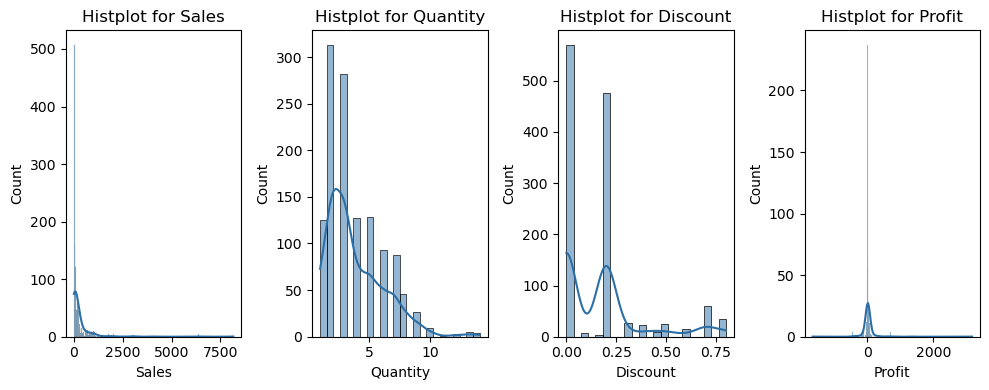

In [42]:
# Set the figure layout
fig, ax = plt.subplots(1,4, figsize = (10,4))

# Histplot for Sales
sns.histplot(data = numerical_columns, x = 'Sales', kde=True, ax=ax[0], color = '#2B6FA6')
ax[0].set_title('Histplot for Sales')

# Histplot for Profit
sns.histplot(data = numerical_columns, x = 'Quantity', kde=True, ax=ax[1], color = '#2B6FA6')
ax[1].set_title('Histplot for Quantity')

# Histplot for Sales
sns.histplot(data = numerical_columns, x = 'Discount', kde=True, ax=ax[2], color = '#2B6FA6')
ax[2].set_title('Histplot for Discount')

# Histplot for Profit
sns.histplot(data = numerical_columns, x = 'Profit', kde=True, ax=ax[3], color = '#2B6FA6')
ax[3].set_title('Histplot for Profit')

# Display the plots
plt.tight_layout()
plt.show()

Insight:

- The histograms of the numerical variables align well with the descriptive summary.
- Sales: The distribution is right-skewed, indicating the presence of outliers with unusually high sales values.
- Quantity: Most orders fall within the range of 1–5 items, suggesting that customers typically purchase only a small number of products per order.
- Discount: Discounts are predominantly between 0% and 20%, though some extend up to 80%, reflecting occasional heavy promotions.
- Profit: Profit values span a wide range, from significant losses (negative profit) to substantial gains, highlighting variability in profitability across orders.

- Check for Outliers - Sales

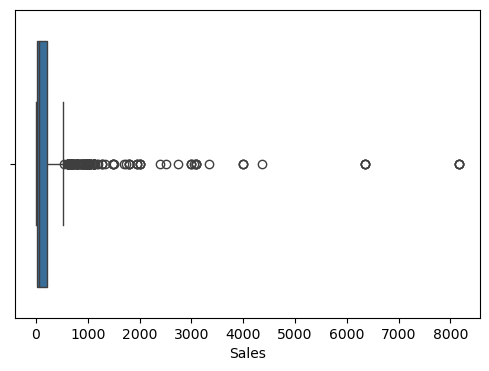

In [43]:
plt.figure(figsize=(6,4))
sns.boxplot(data = numerical_columns, x='Sales', color = '#2B6FA6')
plt.show()

In [44]:
merged_data[merged_data['Sales'] >= 6000]

,Order ID,Order Date,Payment method,Sales,Quantity,Discount,Profit,Ship Mode,Courier,Delivered Date,Delivery Timing,Delivery Duration,State,Category,Sub-Category,Name,Gender,Segment,Year,Month,Day,Day_of_Week,Profit Grouping
165,OD0166,2023-05-11,Visa,8159.95,8,0.4,-1359.99,Standard Class,Parcel Express,2023-05-31,On time,20,Kuala Lumpur,Technology,Machines,Arjun Kumar,Male,Consumer,2023,5,11,Thursday,Loss
517,OD0510,2023-05-20,Mastercard,6354.95,5,0.0,3177.48,Standard Class,Parcel Express,2023-06-19,Late,30,Sarawak,Office Supplies,Binders,Vikram Rao,Male,Consumer,2023,5,20,Saturday,Profit
750,OD0740,2023-05-13,Mastercard,8159.95,8,0.4,-1359.99,Standard Class,HomeLaju,2023-06-02,On time,20,Kuala Lumpur,Technology,Machines,Arjun Kumar,Male,Consumer,2023,5,13,Saturday,Loss
751,OD0741,2023-05-05,Visa,8159.95,8,0.4,-1359.99,Standard Class,HomeLaju,2023-05-25,On time,20,Kuala Lumpur,Technology,Machines,Arjun Kumar,Male,Consumer,2023,5,5,Friday,Loss
752,OD0742,2023-05-21,Mastercard,8159.95,8,0.4,-1359.99,Standard Class,HomeLaju,2023-06-20,Late,30,Kuala Lumpur,Technology,Machines,Arjun Kumar,Male,Consumer,2023,5,21,Sunday,Loss
1202,OD1190,2023-05-20,Mastercard,6354.95,5,0.0,3177.48,Standard Class,Hero Van,2023-06-09,On time,20,Sarawak,Office Supplies,Binders,Vikram Rao,Male,Consumer,2023,5,20,Saturday,Profit
1203,OD1191,2023-05-27,Mastercard,6354.95,5,0.0,3177.48,Standard Class,Parcel Express,2023-06-26,Late,30,Sarawak,Office Supplies,Binders,Vikram Rao,Male,Consumer,2023,5,27,Saturday,Profit
1204,OD1192,2023-05-17,E-wallet,6354.95,5,0.0,3177.48,Standard Class,Hero Van,2023-06-06,On time,20,Sarawak,Office Supplies,Binders,Vikram Rao,Male,Consumer,2023,5,17,Wednesday,Profit


Insight

- Outliers are present in the Sales data; however, they stem from valid transactions. These outliers represent genuine high-value sales that significantly contribute to overall sales performance. Therefore, they should be retained rather than removed, as they provide important insights into product demand and revenue generation.

#### 2. Explore Categorical Variables

In [45]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1251 entries, 0 to 1250
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Order ID           1251 non-null   object        
 1   Order Date         1251 non-null   datetime64[ns]
 2   Payment method     1251 non-null   object        
 3   Sales              1251 non-null   float64       
 4   Quantity           1251 non-null   int64         
 5   Discount           1251 non-null   float64       
 6   Profit             1251 non-null   float64       
 7   Ship Mode          1251 non-null   object        
 8   Courier            1251 non-null   object        
 9   Delivered Date     1251 non-null   datetime64[ns]
 10  Delivery Timing    1251 non-null   object        
 11  Delivery Duration  1251 non-null   int64         
 12  State              1251 non-null   object        
 13  Category           1251 non-null   object        
 14  Sub-Cate

- Summary of Categorical Variables

In [46]:
# Drop unnecessary object columns
categorical_data = merged_data.drop(columns = 'Order ID')
categorical_columns = categorical_data.select_dtypes(include = 'object').columns

In [47]:
categorical_data.describe(include='object')

,Payment method,Ship Mode,Courier,Delivery Timing,State,Category,Sub-Category,Name,Gender,Segment,Day_of_Week,Profit Grouping
count,1251,1251,1251,1251,1251,1251,1251,1251,1251,1251,1251,1251
unique,3,4,3,3,5,3,17,20,2,3,7,3
top,Mastercard,Standard Class,Hero Van,On time,Sabah,Office Supplies,Binders,Priya Singh,Male,Consumer,Sunday,Profit
freq,570,740,424,453,263,735,147,73,683,689,189,981


In [48]:
# Frequency distribution of categorical variables
for col in categorical_columns:
    print(f'\nColumn: {col}')
    print(categorical_data[col].value_counts())


Column: Payment method
Payment method
Mastercard    570
Visa          569
E-wallet      112
Name: count, dtype: int64

Column: Ship Mode
Ship Mode
Standard Class    740
Second Class      316
First Class       181
Same Day           14
Name: count, dtype: int64

Column: Courier
Courier
Hero Van          424
HomeLaju          419
Parcel Express    408
Name: count, dtype: int64

Column: Delivery Timing
Delivery Timing
On time    453
Early      414
Late       384
Name: count, dtype: int64

Column: State
State
Sabah           263
Sarawak         256
Kuala Lumpur    255
Johor           243
Penang          234
Name: count, dtype: int64

Column: Category
Category
Office Supplies    735
Furniture          278
Technology         238
Name: count, dtype: int64

Column: Sub-Category
Sub-Category
Binders        147
Paper          146
Storage        143
Art            123
Accessories    111
Phones          99
Chairs          98
Furnishings     95
Tables          58
Appliances      48
Envelopes      

Insight:
- Payment Method: Mastercard and Visa are almost equally used
- Ship Mode: Most customers choose Standard Class with Same Day delivery is very rare
- Courier: Deliveries almost split evenly across all couries about 400 orders with Home Van on top
- Delivery Timing: Orders are fairly balance between groups with on time still has the highest
- State: Orders are concentrated around Sabah, Sarawak and Kuala Lumpur with similar counts and Penang having the lowest orders
- Category: Most orders are for Office Supplies compared to Furniture and Technology
- Sub-Category: The largest items sold are Binders, Paper and Storage while Copiers are the least common sold
- Name: Some names like Priya Singh and Ahmad Ali appears frequenty, suggesting repeat purchases
- Gender: Male and Female customers are almost evenly represented
- Segments: Majority of customers are Consumers followed by Corporate and Home Office

### Data Visualisation:


### A. Sales Performance

#### 1. How do sales vary over time?
- Order Date vs Sales Trends: To observe how sales vary over time

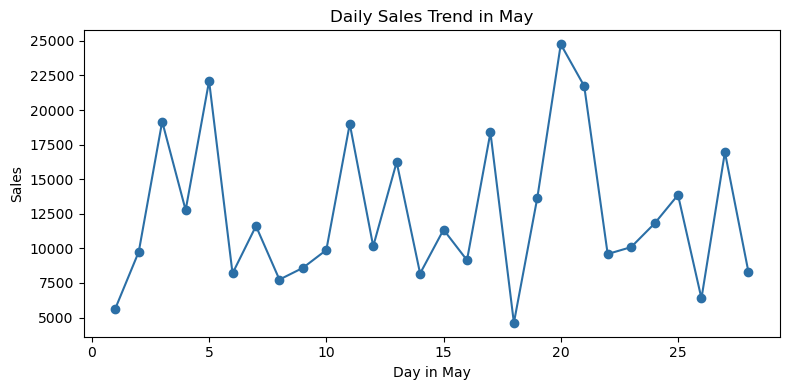

In [49]:
# Sales Trend by Days

# Group sales by day
sales_by_day = merged_data.groupby(['Order Date', 'Day'])['Sales'].sum().reset_index()

# Plot line chart
plt.figure(figsize=(8,4))
plt.plot(sales_by_day['Day'], sales_by_day['Sales'], marker = 'o', linestyle = '-', color = '#2B6FA6')
plt.xlabel('Day in May')
plt.ylabel('Sales')
plt.title('Daily Sales Trend in May')
plt.tight_layout()
plt.show()

Insight:

- There’s no steady upward or downward trend, but rather spikes in sales across random days.
- Suggests that sales may be influenced by discounts, or promotions.

Text(0.5, 1.0, 'Sales by Day of Week')

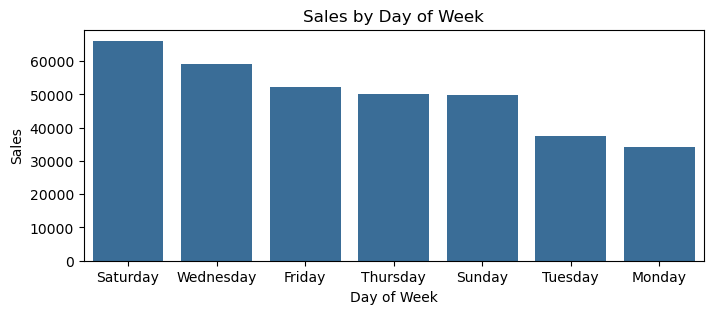

In [50]:
# Group sales by day of week
sales_by_day_of_week = merged_data.groupby('Day_of_Week')['Sales'].sum().sort_values(ascending=False).reset_index(name='Sum')

# Plot bar chart
plt.figure(figsize=(8,3))
sns.barplot(data = sales_by_day_of_week, x='Day_of_Week', y='Sum', color='#2B6FA6') #21918C
plt.xlabel('Day of Week')
plt.ylabel('Sales')
plt.title('Sales by Day of Week')

Insight:

- Highest sales occur on Saturday, followed by Wednesday and Friday.
- Lowest sales happen on Monday, indicating weaker customer demand at the start of the week.
- Weekend and mid-week show stronger performance compared to early-week days.

#### 2. Which products bring in the most sales
- Product Category vs Sales - To identify the top-selling category and sub-category

In [51]:
# Group sales by category and sub-category
sales_by_category_and_sub = merged_data.groupby(['Category', 'Sub-Category'])['Sales'].sum().reset_index()
sales_by_category_and_sub

,Category,Sub-Category,Sales
0,Furniture,Bookcases,27263.02
1,Furniture,Chairs,47196.30
2,Furniture,Furnishings,7779.31
3,Furniture,Tables,37685.88
4,Office Supplies,Appliances,10704.68
5,Office Supplies,Art,8681.26
6,Office Supplies,Binders,37054.65
7,Office Supplies,Envelopes,2806.20
8,Office Supplies,Fasteners,549.83
9,Office Supplies,Labels,1137.07


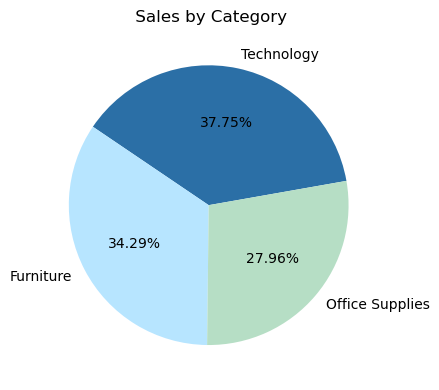

In [52]:
# Sales by Category
sales_by_category= merged_data.groupby('Category')['Sales'].sum().sort_values(ascending=False).reset_index()

colors = ['#2B6FA6', '#b7e5ff', '#B6DEC5']

# Plot pie chart
plt.figure(figsize=(5,4))
plt.pie(sales_by_category['Sales'], labels=sales_by_category['Category'], autopct = '%1.2f%%', startangle=10, colors=colors)
plt.title(' Sales by Category')
plt.tight_layout()
plt.show()

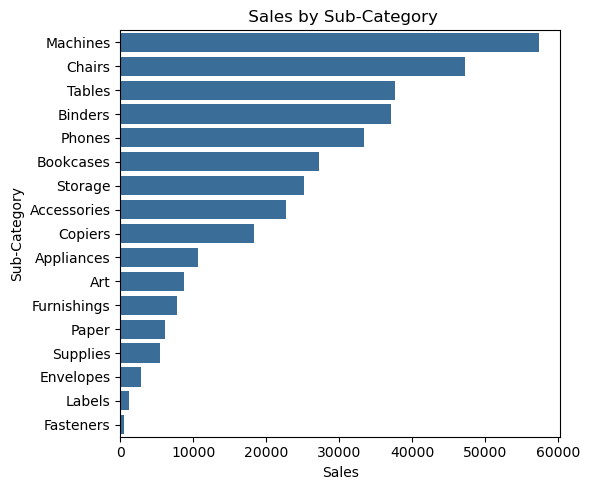

In [53]:
## Sales by Sub-Category
sales_by_subcategory = merged_data.groupby(['Category', 'Sub-Category'])['Sales'].sum().sort_values(ascending=False).reset_index()

# Plot horizontal bar chart
plt.figure(figsize=(6,5))
sns.barplot(data = sales_by_subcategory, x='Sales' , y ='Sub-Category', color='#2B6FA6')
plt.title(' Sales by Sub-Category')
plt.tight_layout()
plt.show()

Insight: 

By Category:
- Technology is the top revenue generator, followed by Furniture and Office Supplies.
- This suggests that tech-related items are the most profitable segment for the business.

By Sub-Category:
- Machines contribute the highest sales, followed by Chairs and Tables.
- On the lower end, items like Fasteners and Labels generate minimal sales.

Overall, technology products, particularly Machines, are the main sales drivers, while certain Office Supplies like Fasteners and Labels contribute very little.

### B. Shipping Efficiency

#### 1. Are certain shipping methods causing more delivery delays?
- Shipping Method vs Delivery Timing - To compare how different shipping methods and couriers perform

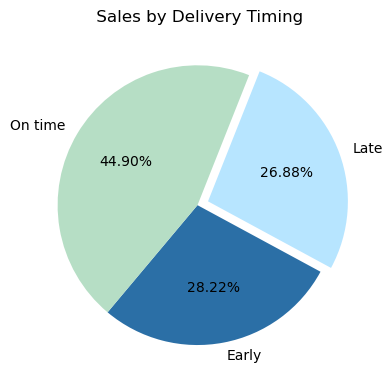

In [54]:
# Sales by Delivery Timing

# Group delivery timing by sales to identify how delay contribute to sales 
sales_by_shipping_timing = merged_data.groupby('Delivery Timing')['Sales'].sum().reset_index()

colors = ['#2B6FA6', '#b7e5ff', '#B6DEC5']

explode = [0,0.08,0]

# Plot pie chart
plt.figure(figsize=(5,4))
plt.pie(sales_by_shipping_timing['Sales'], labels=sales_by_shipping_timing['Delivery Timing'], autopct = '%1.2f%%', startangle=230, colors=colors, explode=explode)
plt.title(' Sales by Delivery Timing')
plt.tight_layout()
plt.show()

In [55]:
# Total sales by ship mode
sales_by_ship_mode = merged_data.groupby('Ship Mode')['Sales'].sum().sort_values(ascending=False).reset_index()
sales_by_ship_mode

,Ship Mode,Sales
0,Standard Class,234451.43
1,Second Class,78301.07
2,First Class,32382.66
3,Same Day,4589.09


In [56]:
# Group by shipping delay
shipping_delay = merged_data[merged_data['Delivery Timing']=='Late']

# Shipping delay by ship mode
delay_by_ship_mode = shipping_delay.groupby('Ship Mode')['Delivery Timing'].value_counts().sort_values(ascending=False).reset_index(name='Count')
delay_by_ship_mode

,Ship Mode,Delivery Timing,Count
0,Standard Class,Late,239
1,Second Class,Late,91
2,First Class,Late,52
3,Same Day,Late,2


In [57]:
# Total sales by courier
sales_by_courier = merged_data.groupby('Courier')['Sales'].sum().sort_values(ascending=False).reset_index()
sales_by_courier

,Courier,Sales
0,HomeLaju,128494.19
1,Parcel Express,114695.93
2,Hero Van,106534.13


In [58]:
# Shipping delay by courier
delay_by_courier = shipping_delay.groupby('Courier')['Delivery Timing'].value_counts().sort_values(ascending=False).reset_index(name='Count')
delay_by_courier

,Courier,Delivery Timing,Count
0,HomeLaju,Late,137
1,Parcel Express,Late,128
2,Hero Van,Late,119


C:\Users\marya\AppData\Local\Temp\ipykernel_8916\1524947335.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = delay_by_ship_mode, x='Ship Mode', y='Count', palette='GnBu')
C:\Users\marya\AppData\Local\Temp\ipykernel_8916\1524947335.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = delay_by_courier, x='Courier', y='Count', palette='GnBu')


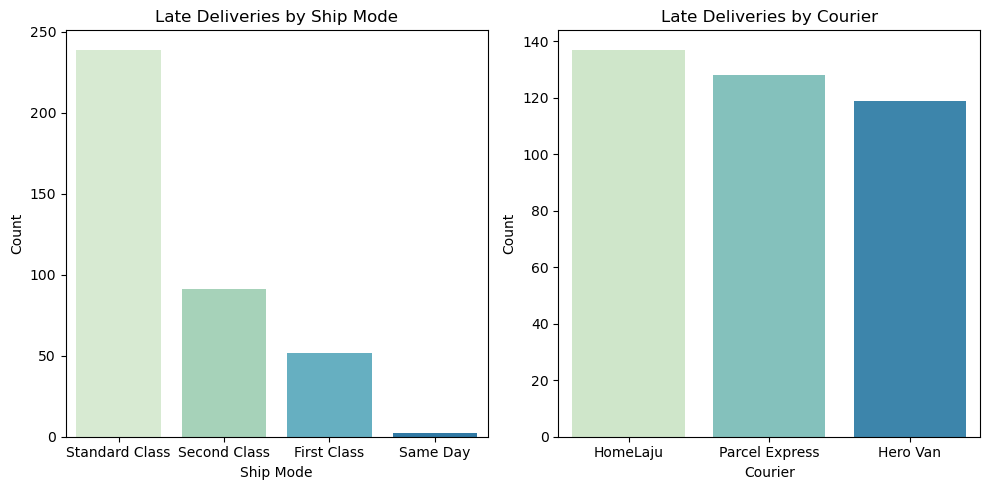

In [59]:
# Plot the shipping delay by shipping method
plt.figure(figsize=(10,5))

# Shipping delay by ship mode
plt.subplot(1,2,1)
sns.barplot(data = delay_by_ship_mode, x='Ship Mode', y='Count', palette='GnBu')
plt.xlabel('Ship Mode')
plt.ylabel('Count')
plt.title('Late Deliveries by Ship Mode')

# Shipping delay by courier
plt.subplot(1,2,2)
sns.barplot(data = delay_by_courier, x='Courier', y='Count', palette='GnBu')
plt.xlabel('Courier')
plt.ylabel('Count')
plt.title('Late Deliveries by Courier')

plt.tight_layout()
plt.show()

Insight:

Ship Delay by Ship Mode:
- Standard Class has the highest number of late deliveries (239), followed by Second Class (91) and First Class (52).
- Same Day shipping has the least delays (only 2), suggesting better reliability for urgent orders.
- This indicates that delays are concentrated in Standard Class, likely due to higher order volume or slower processing.

Ship Delay by Courier:
- All three couriers show significant delays, with HomeLaju leading (137 late deliveries), followed closely by Parcel Express (128) and Hero Van (119).
- The distribution is fairly balanced, suggesting delays may be influenced by overall shipping method and system capacity rather than a single courier issue.

#### 2. Are there regional trends in shipping delays?
- State vs Delivery Timing: To understand whether shipping delays are concentrated in specific geographic states.

In [60]:
# Total sales by state
sales_by_state = merged_data.groupby('State')['Sales'].sum().sort_values(ascending=False).reset_index()
sales_by_state

,State,Sales
0,Sarawak,84245.12
1,Kuala Lumpur,82629.44
2,Johor,73613.52
3,Sabah,67334.79
4,Penang,41901.38


In [61]:
# Shipping delay by state
delay_by_state = shipping_delay.groupby('State')['Delivery Timing'].value_counts().sort_values(ascending=False).reset_index(name='Count')
delay_by_state

,State,Delivery Timing,Count
0,Johor,Late,88
1,Penang,Late,75
2,Sabah,Late,75
3,Sarawak,Late,74
4,Kuala Lumpur,Late,72


C:\Users\marya\AppData\Local\Temp\ipykernel_8916\721234664.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = sales_by_state, x='State', y='Sales', palette='GnBu')
C:\Users\marya\AppData\Local\Temp\ipykernel_8916\721234664.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=delay_by_state, x="State", y='Count', palette = 'GnBu')


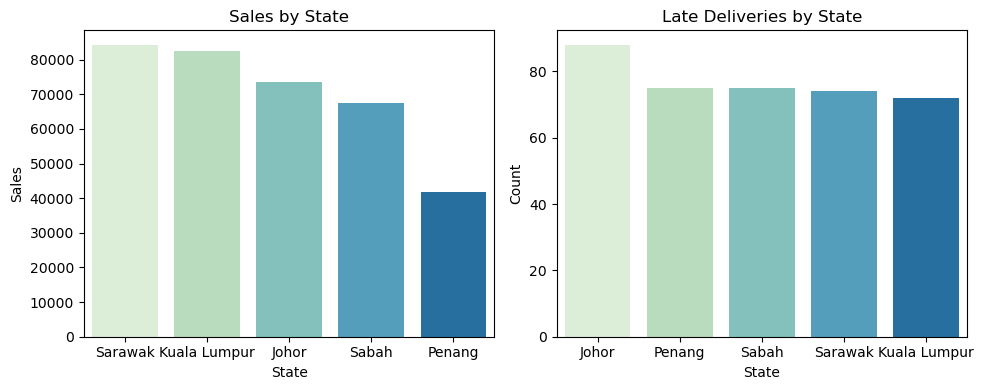

In [62]:
sales_by_state = merged_data.groupby('State')['Sales'].sum().sort_values(ascending=False).reset_index()

# Plot the shipping delay by state
plt.figure(figsize=(10,4))

# Total Sales by state
plt.subplot(1,2,1)
sns.barplot(data = sales_by_state, x='State', y='Sales', palette='GnBu')
plt.xlabel('State')
plt.ylabel('Sales')
plt.title('Sales by State')

# Delay by state
plt.subplot(1,2,2)
sns.barplot(data=delay_by_state, x="State", y='Count', palette = 'GnBu')
plt.xlabel('State')
plt.ylabel('Count')
plt.title('Late Deliveries by State')

plt.tight_layout()
plt.show()

Insight:

Sales by State
- Sarawak and Kuala Lumpur lead in total sales, followed by Johor.
- Sabah and Penang contribute less in comparison.
- This shows that sales are concentrated in Sarawak and KL, making them key revenue drivers.

Shipping Delay by State
- Johor has the highest number of late deliveries, followed by Penang, Sabah, Sarawak and KL.
- Delays are spread across states but are most severe in Johor.
- This suggests possible operational or courier issues specific to certain regions.

### C. Customer Behavior on Profit

#### 1. Which customer segments are the most profitable for the business?
- Customer Segment vs Profitability: To assess which segments (Consumer, Corporate, Home Office) generate the highest profit contribution.

In [63]:
# Profit by profit grouping
profit_by_grouping = merged_data.groupby('Profit Grouping')['Profit'].sum().sort_values(ascending=False).reset_index(name='Profit')
profit_by_grouping

,Profit Grouping,Profit
0,Profit,62597.29
1,Break-even,0.00
2,Loss,-36698.13


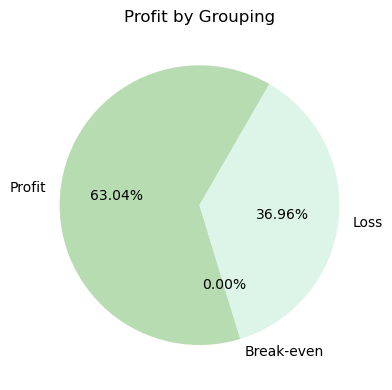

In [64]:
# Profit composition

# Add absolute to include loss on pie chart
profit_by_grouping['Profit (abs)'] = profit_by_grouping['Profit'].abs()

colors = ['#B8DCB2', '#d5ff87', '#DCF5E8'] 

# Plot pie chart
plt.figure(figsize=(5,4))
plt.pie(profit_by_grouping['Profit (abs)'], labels=profit_by_grouping['Profit Grouping'], autopct = '%1.2f%%', startangle=60, colors=colors)
plt.title('Profit by Grouping')
plt.tight_layout()
plt.show()

Insight:

- The company generated an overall profit of ~62.6K, but also incurred losses of ~36.7K.
- Break-even orders are negligible.
- This suggests profitability overall, but a significant portion of sales still resulted in losses, which could be linked to heavy discounts.

In [65]:
# Group profit by positive profit
positive_profit = merged_data[merged_data['Profit Grouping'] == 'Profit']
positive_profit.head()

,Order ID,Order Date,Payment method,Sales,Quantity,Discount,Profit,Ship Mode,Courier,Delivered Date,Delivery Timing,Delivery Duration,State,Category,Sub-Category,Name,Gender,Segment,Year,Month,Day,Day_of_Week,Profit Grouping
0,OD0001,2023-05-28,E-wallet,261.96,2,0.0,41.91,Second Class,Parcel Express,2023-06-17,On time,20,Kuala Lumpur,Furniture,Bookcases,Li Wei,Male,Consumer,2023,5,28,Sunday,Profit
1,OD0002,2023-05-23,Mastercard,731.94,3,0.0,219.58,Second Class,Parcel Express,2023-06-12,On time,20,Penang,Furniture,Chairs,Chen Jia,Female,Consumer,2023,5,23,Tuesday,Profit
2,OD0003,2023-05-17,E-wallet,14.62,2,0.0,6.87,Second Class,Hero Van,2023-06-06,On time,20,Johor,Office Supplies,Labels,Zhang Lei,Male,Corporate,2023,5,17,Wednesday,Profit
4,OD0005,2023-05-22,Visa,22.37,2,0.2,2.52,Standard Class,HomeLaju,2023-06-21,Late,30,Sarawak,Office Supplies,Storage,Liu Ying,Female,Consumer,2023,5,22,Monday,Profit
5,OD0006,2023-05-23,Visa,48.86,7,0.0,14.17,Standard Class,Hero Van,2023-06-02,Early,10,Kuala Lumpur,Furniture,Furnishings,Arjun Kumar,Male,Consumer,2023,5,23,Tuesday,Profit


In [66]:
# Profit by gender
profit_by_gender = positive_profit.groupby('Gender')['Profit'].sum().sort_values(ascending=False).reset_index(name='Profit')
profit_by_gender

,Gender,Profit
0,Male,43044.75
1,Female,19552.54


In [67]:
# Profit by customer segment
profit_by_customer_segment = positive_profit.groupby(['Segment', 'Gender'])['Profit'].sum().sort_values(ascending=False).reset_index(name='Profit')
profit_by_customer_segment

,Segment,Gender,Profit
0,Consumer,Male,22936.07
1,Home Office,Male,12772.83
2,Consumer,Female,11543.79
3,Corporate,Male,7335.85
4,Home Office,Female,5606.16
5,Corporate,Female,2402.59


In [68]:
# Profit by payment method
profit_by_payment_method = positive_profit.groupby(['Payment method', 'Gender'])['Profit'].sum().sort_values(ascending=False).reset_index(name='Profit')
profit_by_payment_method

,Payment method,Gender,Profit
0,Mastercard,Male,25111.17
1,Visa,Male,10968.43
2,Mastercard,Female,10696.35
3,Visa,Female,7829.16
4,E-wallet,Male,6965.15
5,E-wallet,Female,1027.03


C:\Users\marya\AppData\Local\Temp\ipykernel_8916\280697952.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = profit_by_gender, x='Gender', y='Profit', palette='GnBu')


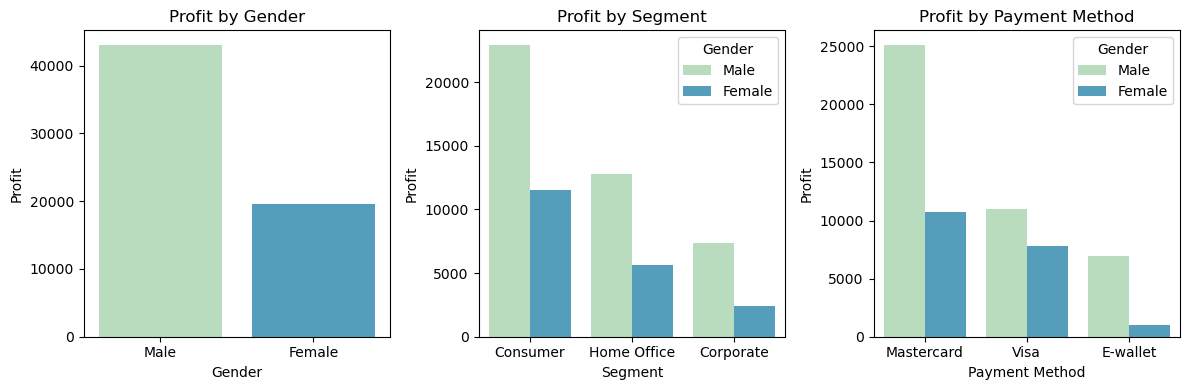

In [69]:
# Plot the bar chart on profit by customer behaviors

plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
sns.barplot(data = profit_by_gender, x='Gender', y='Profit', palette='GnBu')
plt.xlabel('Gender')
plt.ylabel('Profit')
plt.title('Profit by Gender')

plt.subplot(1,3,2)
sns.barplot(data = profit_by_customer_segment, x='Segment', y='Profit', hue= 'Gender', palette='GnBu')
plt.xlabel('Segment')
plt.ylabel('Profit')
plt.title('Profit by Segment')

plt.subplot(1,3,3)
sns.barplot(data = profit_by_payment_method, x='Payment method', y='Profit', hue= 'Gender', palette='GnBu')
plt.xlabel('Payment Method')
plt.ylabel('Profit')
plt.title('Profit by Payment Method')

plt.tight_layout()
plt.show()

Insight:

Profit by Gender
- Male customers contribute more than twice the profit of female customers.

Profit by Segment
- Consumer segment is the most profitable overall.
- Home Office comes next, while Corporate contributes the least profit.
- Within each segment, males contribute more profit than females, especially in the Consumer segment.

Profit by Payment Method
- Mastercard users generate the highest profit, followed by Visa.
- E-wallet contributes the least profit to the business.
- Across all methods, male customers contribute more profit than female customers.

### D. Profit vs Sales

#### 1. Are there any relationship between Sales and Profit?
- check for profit trend and it's relationship with sales

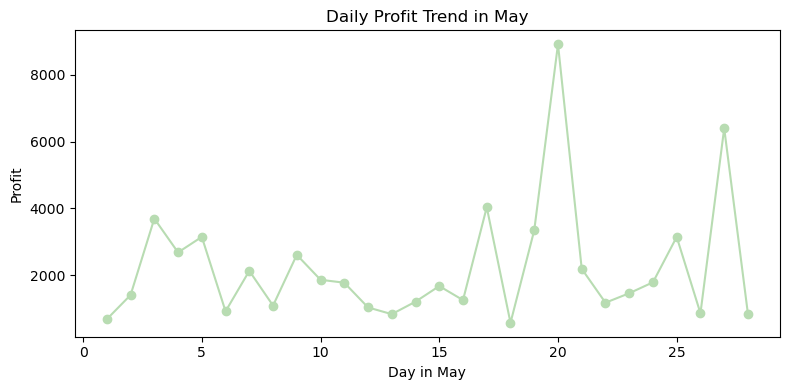

In [70]:
# Plotting profit trends 

# Group positive profit by day
profit_by_day = positive_profit.groupby(['Order Date', 'Day'])['Profit'].sum().reset_index()

# Plot line chart
plt.figure(figsize=(8,4))
plt.plot(profit_by_day['Day'], profit_by_day['Profit'], marker = 'o', linestyle = '-', color = '#B8DCB2') 
plt.xlabel('Day in May')
plt.ylabel('Profit')
plt.title('Daily Profit Trend in May')
plt.tight_layout()
plt.show()

Insight:

- Profit levels fluctuate significantly from day to day, indicating inconsistent profitability.
- Several days record relatively low profits, showing that stable profit generation is a challenge.

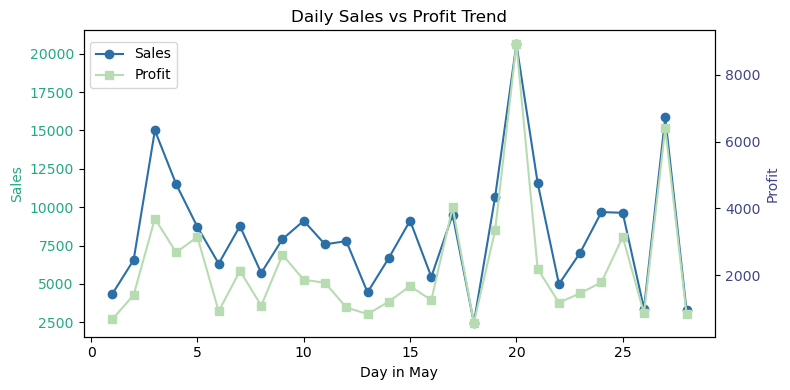

In [71]:
# Plotting both sales trend and profit trends for comparison

# Group sales by days with positive profit
sales_trend_based_on_positive_profit = positive_profit.groupby(['Order Date', 'Day'])['Sales'].sum().reset_index()

# Merge sales and profit by Day (to align x-axis)
trend = pd.merge(sales_trend_based_on_positive_profit, profit_by_day, on=['Order Date','Day'], how='left').fillna(0)

# Plot with dual y-axis
fig, ax1 = plt.subplots(figsize=(8,4))

# Sales line (left y-axis)
ax1.plot(trend['Day'], trend['Sales'], marker='o', color='#2B6FA6', label='Sales')
ax1.set_xlabel("Day in May")
ax1.set_ylabel("Sales", color='#22A884')
ax1.tick_params(axis='y', labelcolor='#22A884')

# Profit line (right y-axis)
ax2 = ax1.twinx()
ax2.plot(trend['Day'], trend['Profit'], marker='s', color='#B8DCB2', label='Profit') 
ax2.set_ylabel("Profit", color='#414487')
ax2.tick_params(axis='y', labelcolor='#414487')

plt.title("Daily Sales vs Profit Trend")
fig.legend(loc="upper left", bbox_to_anchor=(0.11,0.9))
plt.tight_layout()
plt.show()


Insight:

- Sales and profit move together, but profit remains much lower in scale.
- Some high sales days do not result in equally high profits, suggesting discounting or high cost of sales.
- In general, profit is lower and more unstable compared to sales, showing that high sales days don’t always bring high profits.

In [72]:
# Check for correlation between numerical variables to identify the relationship
corr = positive_profit[['Sales', 'Profit', 'Quantity', 'Discount']].corr()
corr

,Sales,Profit,Quantity,Discount
Sales,1.000000,0.932677,0.173878,-0.046889
Profit,0.932677,1.000000,0.103880,-0.107460
Quantity,0.173878,0.103880,1.000000,0.103598
Discount,-0.046889,-0.107460,0.103598,1.000000


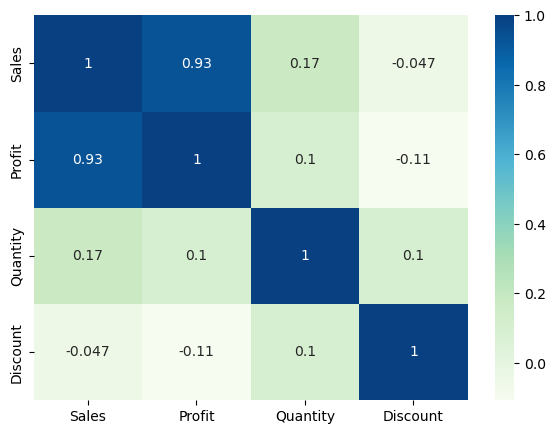

In [73]:
# Plot the correlation
plt.figure(figsize=(7,5))
sns.heatmap(data=corr, annot=True, cmap='GnBu')
plt.show()

Insight:

- Strong positive correlation (0.93) between Sales and Profit, meaning higher sales generally lead to higher profit.
- Weak positive relationship between Quantity and both Sales/Profit.
- Discounts show a negative correlation with both Sales (-0.05) and Profit (-0.11), meaning higher discounts reduce profitability.

## 5️⃣ Data Insights

Insight:
- Sales Trends: Sales fluctuate daily and peak mid-week and weekends. Technology products, especially Machines, are the strongest revenue drivers.
- Shipping Efficiency: While most deliveries are on time, late deliveries (≈27%) are significant and concentrated in Standard Class shipping and regions like Johor.
- Customer Profitability: Consumers are the most profitable segment, with males and Mastercard users contributing the most profit. However, losses in some sales indicate pricing/discount strategies may need review.
- Profitability vs Sales: High sales do not always result in high profits, highlighting the need to balance promotions with profitability.

Business Implications:
- Focus marketing and stock planning around Technology and Furniture to sustain high revenue.
- Improve shipping processes in Standard Class and specific regions like Johor and Penang to reduce late deliveries and boost customer satisfaction.
- Reevaluate discounting strategies to minimize losses while still driving sales.
- Strengthen engagement with Consumer segments, especially those Male using Mastercard, as they deliver the most profit.